## Exercise Kmeans country with top seller c2c
pg43

1. choose 2 columns of the above dataset  
2. conduct Kmeans clustering  
3. evaluate using silhouette score  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
wh = pd.read_csv('countries_with_top_sellers_fashion_c2c.csv')

                         sellers  topsellers  topsellerratio  \
sellers                 1.000000    0.848427       -0.343874   
topsellers              0.848427    1.000000       -0.296670   
topsellerratio         -0.343874   -0.296670        1.000000   
femalesellersratio     -0.081171   -0.087175       -0.020227   
topfemalesellersratio  -0.074439   -0.109303        0.033244   
femalesellers           0.999165    0.848169       -0.352111   
malesellers             0.993508    0.841663       -0.317904   
topfemalesellers        0.879123    0.989714       -0.300780   
topmalesellers          0.693495    0.933692       -0.259071   
countrysoldratio       -0.155439   -0.172448       -0.038062   
bestsoldratio          -0.073878   -0.067027       -0.002433   
toptotalproductssold    0.865356    0.979208       -0.335004   
totalproductssold       0.945605    0.967760       -0.346661   
toptotalproductslisted  0.854372    0.961932       -0.302586   
totalproductslisted     0.898510    0.96

<AxesSubplot:>

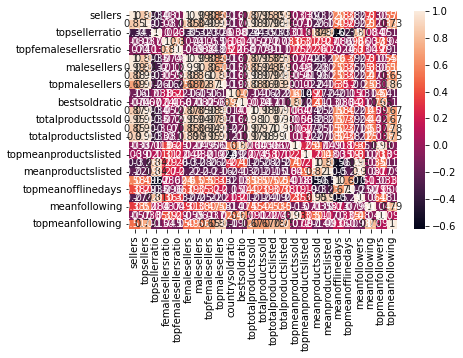

In [3]:

cor = wh.corr() # data.corr()
print(cor)
#wh.cor().sort_values()

# plt.figure(figsize=(10,8))
sns.heatmap(cor, annot = True)

In [4]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [5]:
# 1) Normalise your dataset with Standard Scaler
ss = StandardScaler()
X = wh.iloc[:,[5,10]].values
X_scaled = ss.fit_transform(X)
X_scaled

array([[ 7.50747626e-01, -6.43552050e-01],
       [-3.19290869e+00, -2.07381638e-02],
       [ 7.50747626e-01,  1.76274392e-01],
       [ 7.50747626e-01,  2.37485424e-02],
       [ 7.50747626e-01, -8.53275093e-01],
       [ 7.50747626e-01,  3.35389626e+00],
       [-1.22108053e+00, -7.32525462e-01],
       [ 7.50747626e-01,  2.12733422e+00],
       [-1.60236983e-01, -2.30461207e-01],
       [-6.01926491e-01, -4.84670956e-01],
       [ 7.50747626e-01, -3.06724132e-01],
       [ 7.50747626e-01, -7.13459731e-01],
       [-5.62489928e-01, -3.70276569e-01],
       [ 1.86804773e-01, -5.25143824e-02],
       [ 7.50747626e-01, -1.41487795e-01],
       [-3.79836372e-02, -1.67243256e-03],
       [ 9.21570213e-02, -5.35512906e-01],
       [-1.22108053e+00, -3.13079375e-01],
       [-3.79836372e-02, -2.81303157e-01]])

C:\Users\asusZ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


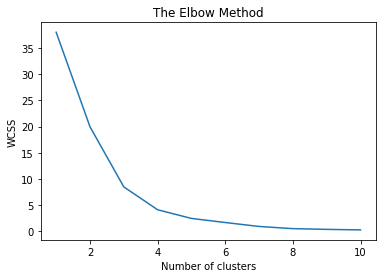

In [6]:
# 2) Using the elbow method to calculate for the optimum cluster size K
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# 3) Using this cluster size K to cluster your dataset
kmeans=KMeans(n_clusters=4,init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 3, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

C:\Users\asusZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


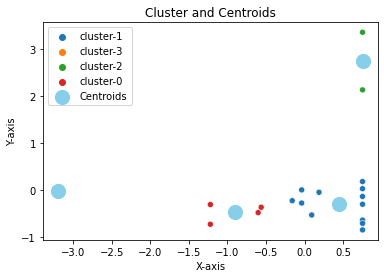

In [8]:
# 4) Visualize your clustering results
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='skyblue', label='Centroids')
plt.title('Cluster and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [9]:
# 5) Evaluate your clustering results using the Silhouette Score
score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(score)

0.4943438269935157
